# Merge subclustering results of Set1

In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data before subclustering
seu_HQC <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC2_Set1.obj')
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


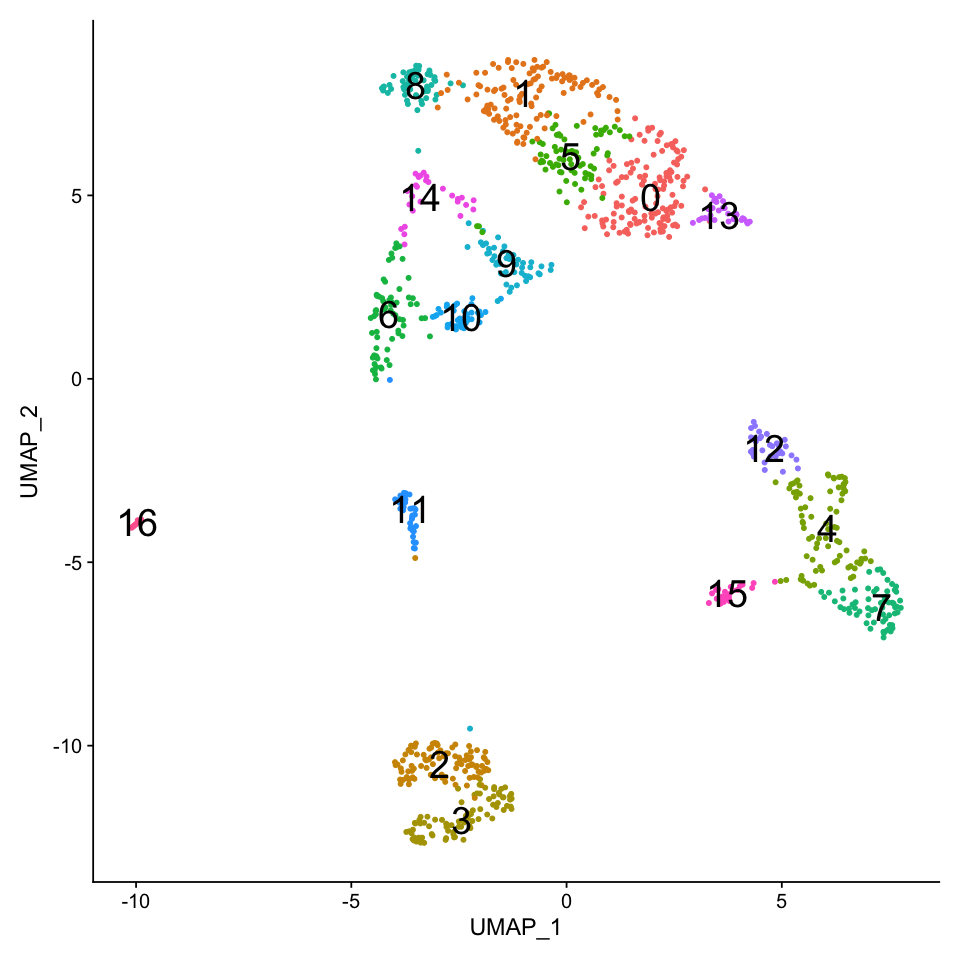

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

In [4]:
#loading subclustering results 
seu.ecto <- readRDS(file = '../../data/seurat_object/Set1/subclustering/seu_lateral_ecto_subclustered.obj')
seu.meso <- readRDS(file = '../../data/seurat_object/Set1/subclustering/seu_mesoderm_subclustered.obj')
seu.head <- readRDS(file = '../../data/seurat_object/Set1/subclustering/seu_head_subclustered.obj')
seu.post <- readRDS(file = '../../data/seurat_object/Set1/subclustering/seu_post_endo_subclustered.obj')
seu.ecto
seu.meso
seu.head
seu.post

An object of class Seurat 
28877 features across 456 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
28877 features across 236 samples within 2 assays 
Active assay: SCT (11281 features, 0 variable features)
 1 other assay present: RNA

An object of class Seurat 
28877 features across 103 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
28877 features across 178 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [5]:
seu.midline <- subset(seu_HQC,idents=c('13'))
seu.midline$manual_ID <- 'midline_cells'

seu.polecell <- subset(seu_HQC,idents=c('16'))
seu.polecell$manual_ID <- 'pole_cells'

## Merge results

In [6]:
seu.merge <- merge(seu.ecto, y = c(seu.meso,seu.head,seu.post,seu.midline,seu.polecell))
seu.merge

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 0 variable features)
 1 other assay present: RNA

In [7]:
seu_HQC$manual_ID <- seu.merge$manual_ID

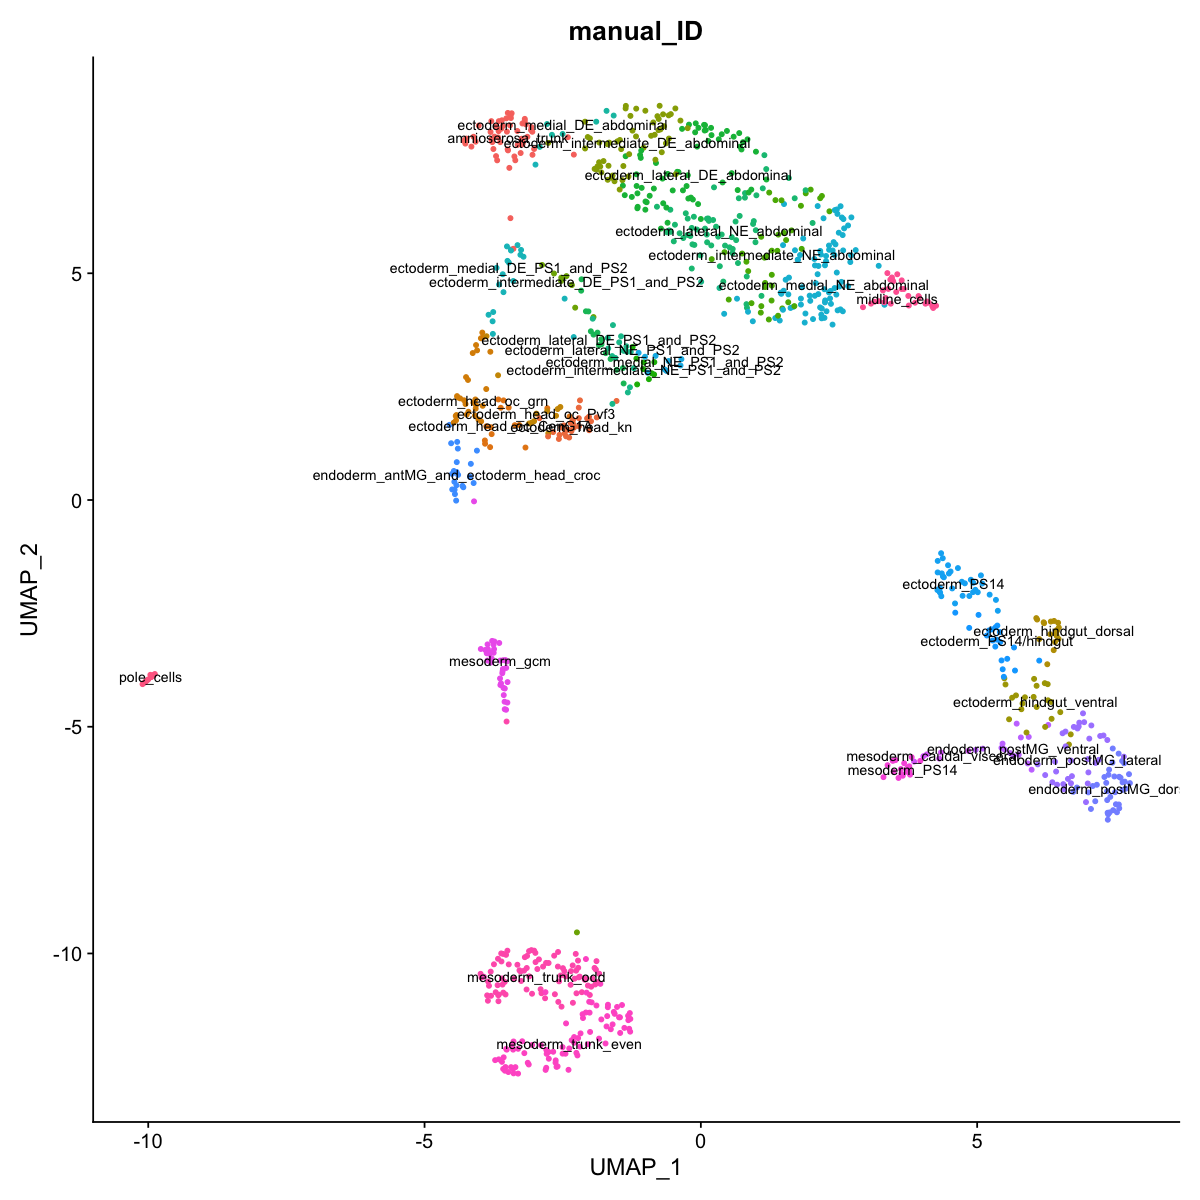

In [8]:
Idents(seu_HQC) <- 'manual_ID'
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(seu_HQC, reduction = 'umap', label.size = 3, group.by = 'manual_ID', label=T) + NoLegend()


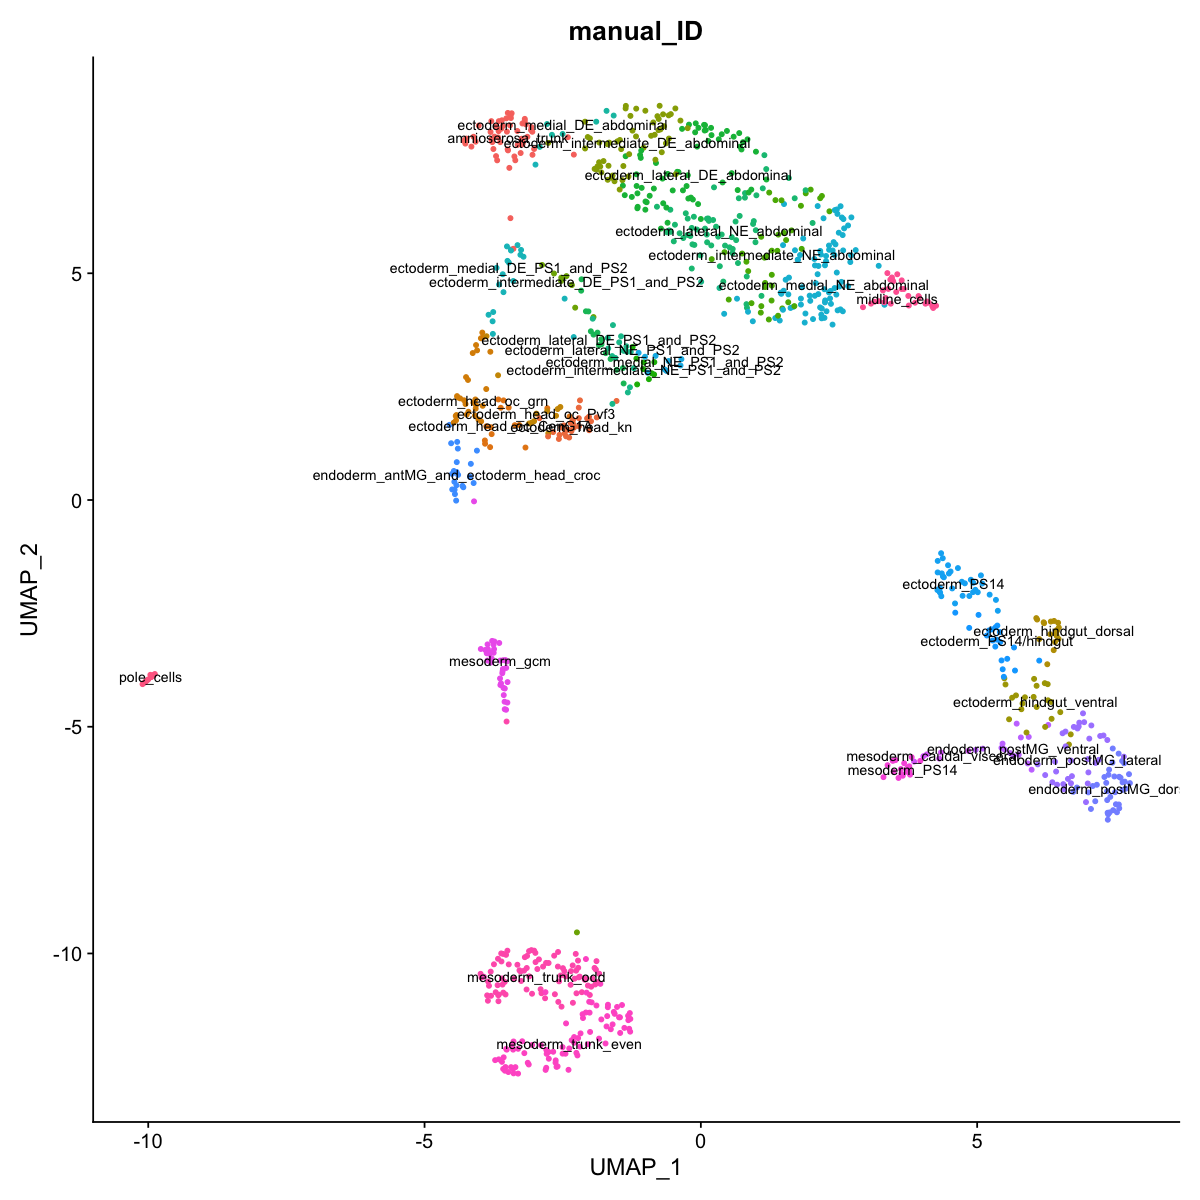

In [9]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(seu_HQC, reduction = 'umap', label.size = 3, group.by = 'manual_ID', label=T) + NoLegend()

In [10]:
levels <- read.table(file="./manual_ID_levels_color_Set1.txt", comment.char = '')
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)
levels(seu_HQC) <- levels

[1] "endoderm_antMG_and_ectoderm_head_croc"
[2] "ectoderm_head_oc_grn"                 
[3] "ectoderm_head_oc_CenG1A"              
[4] "ectoderm_head_oc_Pvf3"                
[5] "ectoderm_head_kn"                     
[6] "ectoderm_medial_DE_PS1_and_PS2"

[1] 32

[1] "lightsteelblue1" "lightsteelblue2" "lightskyblue3"   "skyblue1"       
[5] "skyblue3"        "darkolivegreen1"

Saving 7 x 7 in image



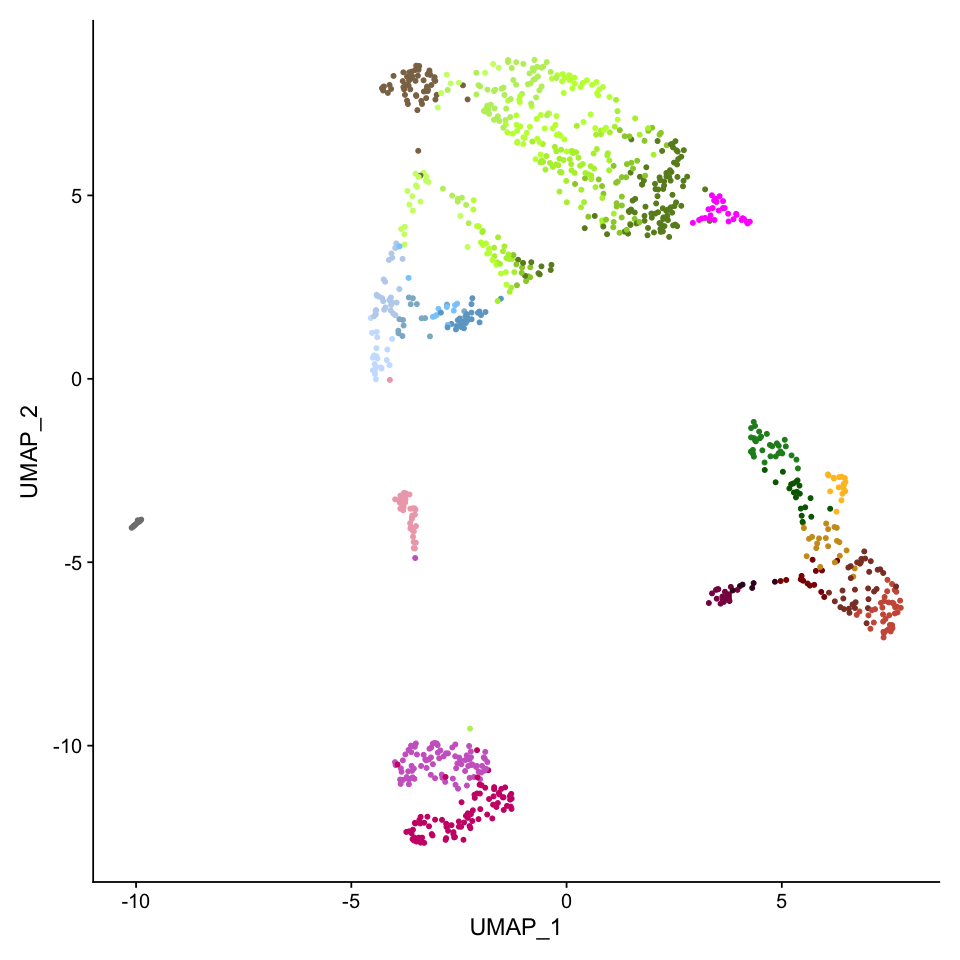

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", label = FALSE, cols = colors) + NoLegend() 
fig
ggsave(fig, file = "./figures/08_merge_ID_Set1/all_cells_umap_Set1.eps", dpi = 300)

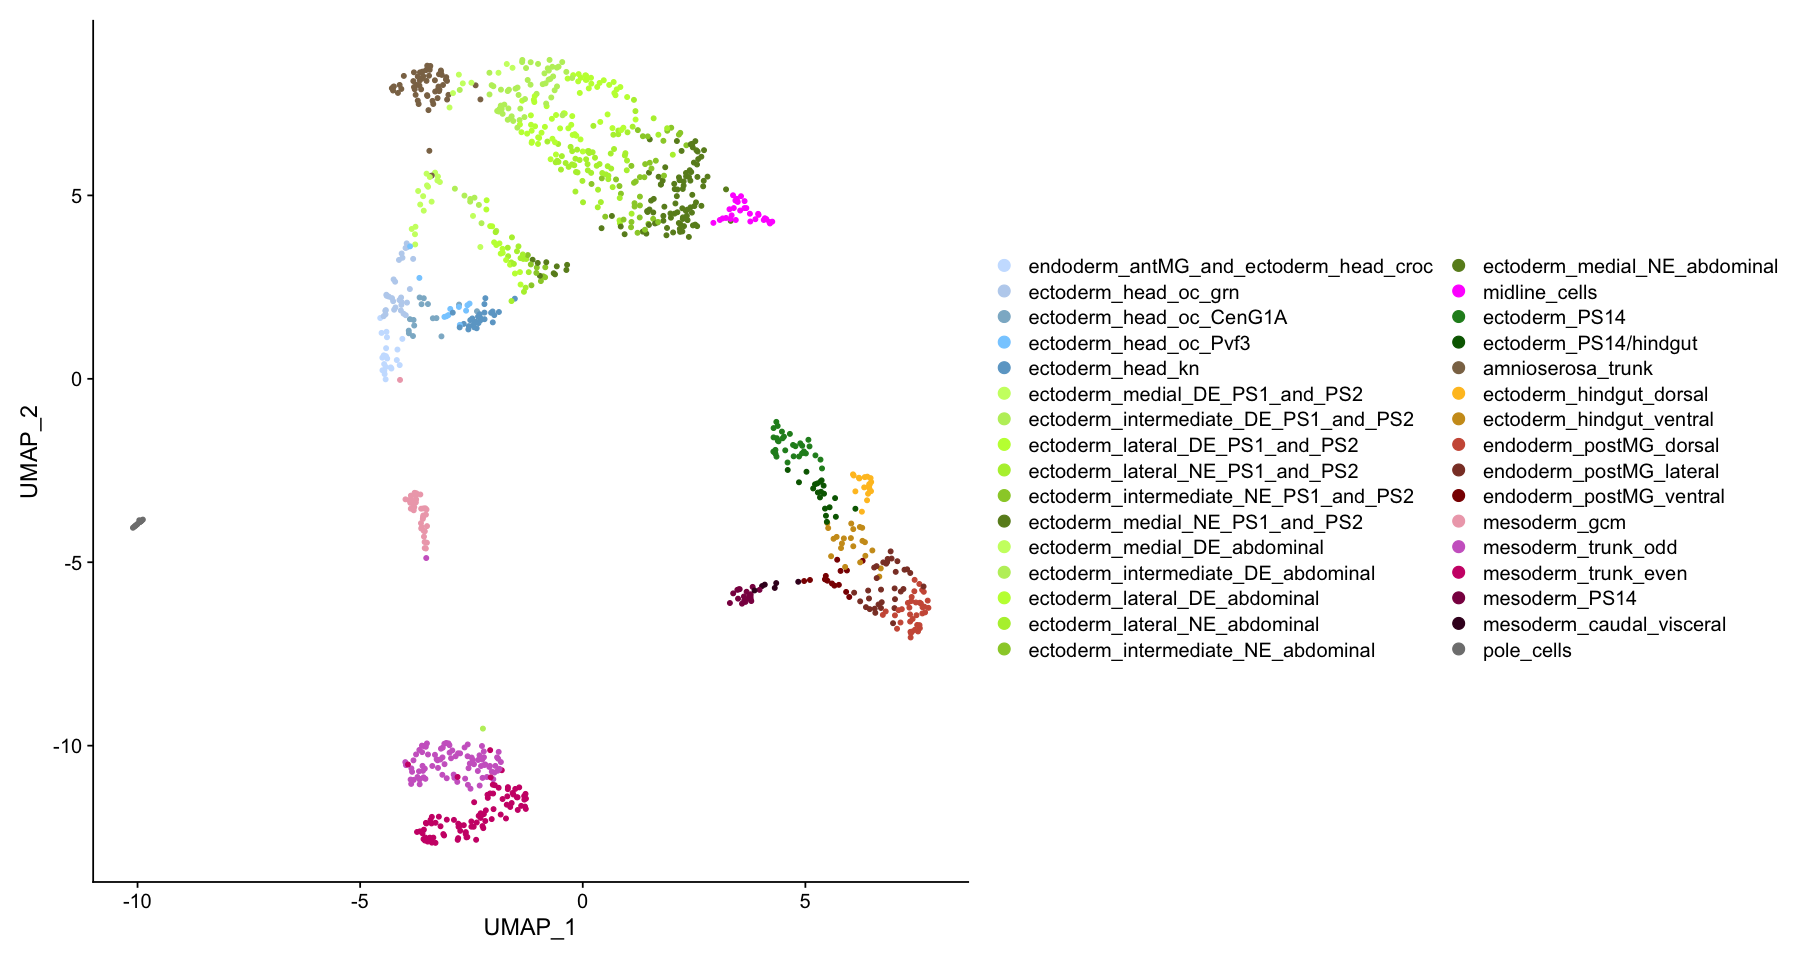

In [12]:
options(repr.plot.width=15, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", label = FALSE, cols = colors)
fig
ggsave(fig, file = "./figures/08_merge_ID_Set1/all_cells_umap2_Set1.eps", dpi = 300, width = 15, height = 8)

## Preparation for make loom file for SCope

In [13]:
manual_ID <- seu_HQC$manual_ID
unique.manual_ID <- unique(manual_ID)
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
seu_HQC$manual_ID_num <- manual_ID_num

In [14]:
Idents(seu_HQC) <- 'manual_ID'
annot_df <- data.frame(list(
    cluster_id = 1:length(unique.manual_ID), 
    cluster_name = unique.manual_ID))
annot_df

cluster_id,cluster_name
<int>,<chr>
1,ectoderm_PS14/hindgut
2,ectoderm_lateral_DE_abdominal
3,ectoderm_PS14
4,ectoderm_medial_DE_PS1_and_PS2
5,amnioserosa_trunk
6,endoderm_postMG_lateral
7,ectoderm_hindgut_ventral
8,ectoderm_hindgut_dorsal
9,mesoderm_caudal_visceral


In [15]:
write.csv(annot_df, file = './annot_df.csv')

In [16]:
saveRDS(object = seu_HQC, file = '../../data/seurat_object/Set1/seu_HQC_subclusterd2_Set1.obj')

In [17]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv